# total

MAE: 0.11344683892859964, MSE: 0.02105596709432706, RMSE: 0.1451067437934125, R-squared: 0.40335633197424825


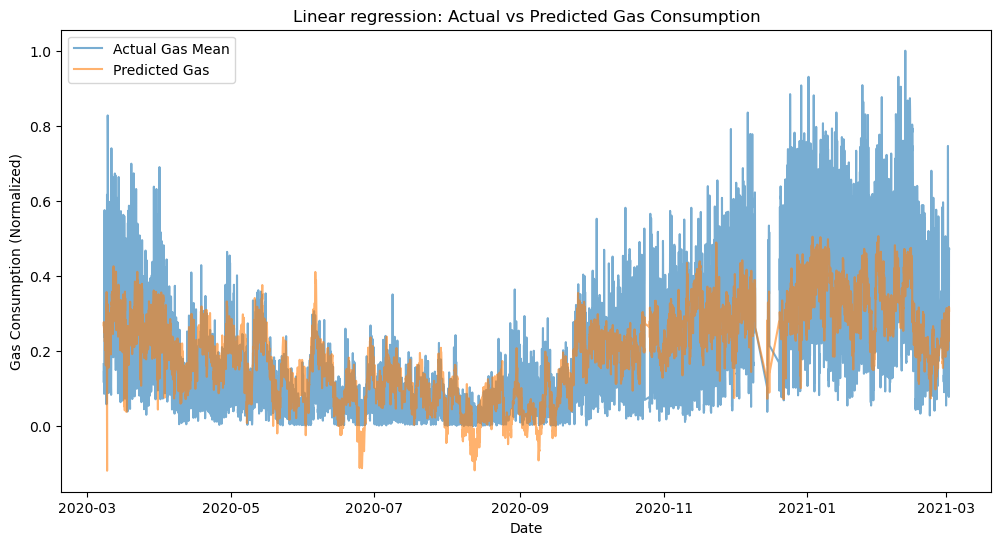

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])
hourly_stat.set_index('Date', inplace=True)
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0
hourly_stat = hourly_stat.dropna()

# Extract the relevant columns for normalization
features = ['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'Gas_mean']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
hourly_stat[features] = scaler.fit_transform(hourly_stat[features])

# Prepare the data
X = hourly_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean']]
y = hourly_stat['Gas_mean']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict gas consumption on both the training and testing data
predicted_gas_train = model.predict(X_train)
predicted_gas_test = model.predict(X_test)

# Concatenate the predictions
predicted_gas_all = np.concatenate([predicted_gas_train, predicted_gas_test])

# Recreate the full predicted series with the original indices
predicted_gas_full = pd.Series(predicted_gas_all, index=np.concatenate([y_train.index, y_test.index]))

# Sort by index to align with the original data
predicted_gas_full = predicted_gas_full.sort_index()

# Evaluate the model on the testing data
mae = mean_absolute_error(y_test, predicted_gas_test)
mse = mean_squared_error(y_test, predicted_gas_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_gas_test)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_stat.index, hourly_stat['Gas_mean'], label='Actual Gas Mean', alpha=0.6)
plt.plot(predicted_gas_full.index, predicted_gas_full, label='Predicted Gas', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Normalized)')
plt.title('Linear regression: Actual vs Predicted Gas Consumption')
plt.legend()
plt.show()


# evaluation metrics 

In [17]:
import math

# Calculate evaluation metrics
mae_Linear_Regression  = mean_absolute_error(y_test, predicted_gas_test)
mse_Linear_Regression = mean_squared_error(y_test, predicted_gas_test)
rmse_Linear_Regression= math.sqrt(mse)
r2_Linear_Regression = r2_score(y_test, predicted_gas_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_Linear_Regression = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_Linear_Regression = mean_absolute_percentage_error(y_test, predicted_gas_test)

print(f'Mean Squared Error (MSE): {mae_Linear_Regression }')
print(f'Root Mean Squared Error (RMSE): {mse_Linear_Regression }')
print(f'R-squared (R²): {r2_Linear_Regression }')
print(f'Adjusted R-squared (R²): {adjusted_r2_Linear_Regression }')

print(f'Mean Absolute Error (MAE): {mae_Linear_Regression }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_Linear_Regression }%')

Mean Squared Error (MSE): 0.11344683892859964
Root Mean Squared Error (RMSE): 0.02105596709432706
R-squared (R²): 0.40335633197424825
Adjusted R-squared (R²): 0.40191690213582665
Mean Absolute Error (MAE): 0.11344683892859964
Mean Absolute Percentage Error (MAPE): 1.8437437189489814%


# SH

MAE: 0.12222523133630836, MSE: 0.024158655392044447, RMSE: 0.155430548451855, R-squared: 0.3154382934250034


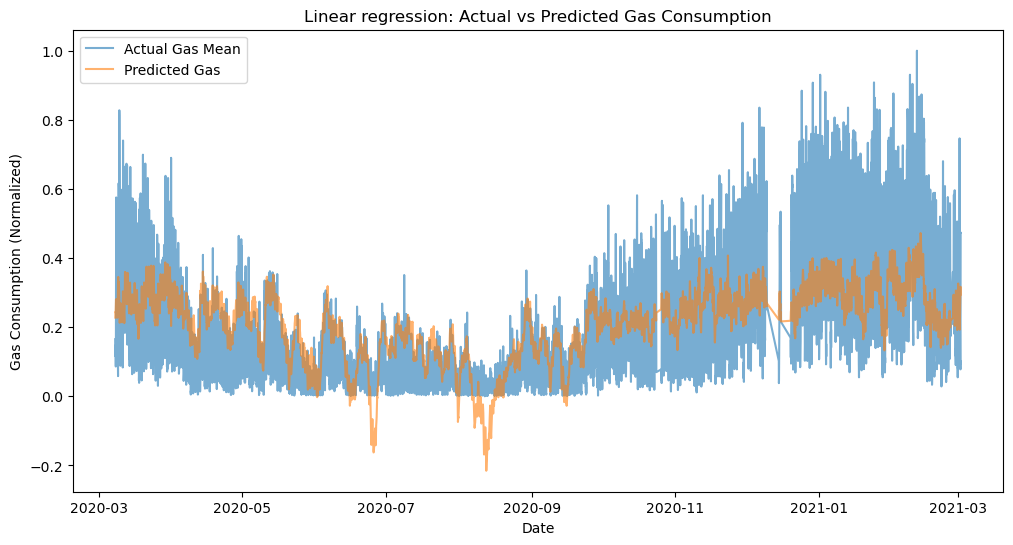

In [19]:
# total

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])
hourly_stat.set_index('Date', inplace=True)
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0
hourly_stat = hourly_stat.dropna()

# Extract the relevant columns for normalization
features = ['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'Gas_mean']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
hourly_stat[features] = scaler.fit_transform(hourly_stat[features])

# Prepare the data
X = hourly_stat[['SH_temp_mean', 'SH_hum_mean']]
y = hourly_stat['Gas_mean']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict gas consumption on both the training and testing data
predicted_gas_train = model.predict(X_train)
predicted_gas_test = model.predict(X_test)

# Concatenate the predictions
predicted_gas_all = np.concatenate([predicted_gas_train, predicted_gas_test])

# Recreate the full predicted series with the original indices
predicted_gas_full = pd.Series(predicted_gas_all, index=np.concatenate([y_train.index, y_test.index]))

# Sort by index to align with the original data
predicted_gas_full = predicted_gas_full.sort_index()

# Evaluate the model on the testing data
mae = mean_absolute_error(y_test, predicted_gas_test)
mse = mean_squared_error(y_test, predicted_gas_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_gas_test)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_stat.index, hourly_stat['Gas_mean'], label='Actual Gas Mean', alpha=0.6)
plt.plot(predicted_gas_full.index, predicted_gas_full, label='Predicted Gas', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Normalized)')
plt.title('Linear regression: Actual vs Predicted Gas Consumption')
plt.legend()
plt.show()






In [20]:
import math

# Calculate evaluation metrics
mae_Linear_Regression_SH  = mean_absolute_error(y_test, predicted_gas_test)
mse_Linear_Regression_SH = mean_squared_error(y_test, predicted_gas_test)
rmse_Linear_Regression_SH= math.sqrt(mse)
r2_Linear_Regression_SH = r2_score(y_test, predicted_gas_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_Linear_Regression_SH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_Linear_Regression_SH = mean_absolute_percentage_error(y_test, predicted_gas_test)

print(f'Mean Squared Error (MSE): {mae_Linear_Regression_SH }')
print(f'Root Mean Squared Error (RMSE): {mse_Linear_Regression_SH }')
print(f'R-squared (R²): {r2_Linear_Regression_SH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_Linear_Regression_SH }')

print(f'Mean Absolute Error (MAE): {mae_Linear_Regression_SH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_Linear_Regression_SH }%')

Mean Squared Error (MSE): 0.12222523133630836
Root Mean Squared Error (RMSE): 0.024158655392044447
R-squared (R²): 0.3154382934250034
Adjusted R-squared (R²): 0.3146135202845517
Mean Absolute Error (MAE): 0.12222523133630836
Mean Absolute Percentage Error (MAPE): 2.0720256605954717%


# DWH


MAE: 0.1276750126678795, MSE: 0.026605351828852496, RMSE: 0.16311147056185993, R-squared: 0.24610849584016603


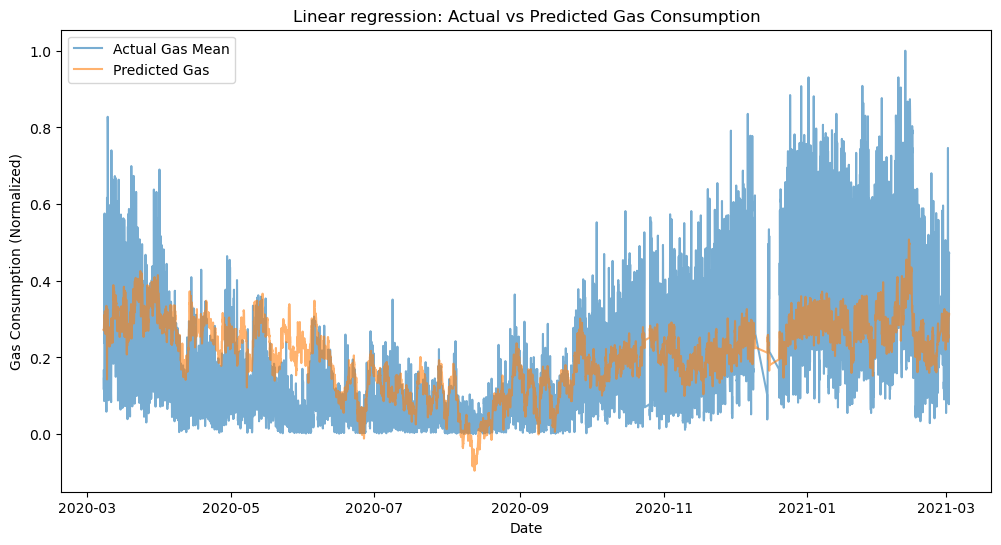

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])
hourly_stat.set_index('Date', inplace=True)
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0
hourly_stat = hourly_stat.dropna()

# Extract the relevant columns for normalization
features = ['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'Gas_mean']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
hourly_stat[features] = scaler.fit_transform(hourly_stat[features])

# Prepare the data
X = hourly_stat[['DWH_temp_mean', 'DWH_hum_mean']]
y = hourly_stat['Gas_mean']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict gas consumption on both the training and testing data
predicted_gas_train = model.predict(X_train)
predicted_gas_test = model.predict(X_test)

# Concatenate the predictions
predicted_gas_all = np.concatenate([predicted_gas_train, predicted_gas_test])

# Recreate the full predicted series with the original indices
predicted_gas_full = pd.Series(predicted_gas_all, index=np.concatenate([y_train.index, y_test.index]))

# Sort by index to align with the original data
predicted_gas_full = predicted_gas_full.sort_index()

# Evaluate the model on the testing data
mae = mean_absolute_error(y_test, predicted_gas_test)
mse = mean_squared_error(y_test, predicted_gas_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_gas_test)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_stat.index, hourly_stat['Gas_mean'], label='Actual Gas Mean', alpha=0.6)
plt.plot(predicted_gas_full.index, predicted_gas_full, label='Predicted Gas', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Normalized)')
plt.title('Linear regression: Actual vs Predicted Gas Consumption')
plt.legend()
plt.show()






In [22]:
import math

# Calculate evaluation metrics
mae_Linear_Regression_DWH  = mean_absolute_error(y_test, predicted_gas_test)
mse_Linear_Regression_DWH = mean_squared_error(y_test, predicted_gas_test)
rmse_Linear_Regression_DWH= math.sqrt(mse)
r2_Linear_Regression_DWH = r2_score(y_test, predicted_gas_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_Linear_Regression_DWH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_Linear_Regression_DWH = mean_absolute_percentage_error(y_test, predicted_gas_test)

print(f'Mean Squared Error (MSE): {mae_Linear_Regression_DWH }')
print(f'Root Mean Squared Error (RMSE): {mse_Linear_Regression_DWH }')
print(f'R-squared (R²): {r2_Linear_Regression_DWH }')
print(f'Adjusted R-squared (R²): {adjusted_r2_Linear_Regression_DWH }')

print(f'Mean Absolute Error (MAE): {mae_Linear_Regression_DWH }')
print(f'Mean Absolute Percentage Error (MAPE): {mape_Linear_Regression_DWH }%')

Mean Squared Error (MSE): 0.1276750126678795
Root Mean Squared Error (RMSE): 0.026605351828852496
R-squared (R²): 0.24610849584016603
Adjusted R-squared (R²): 0.2452001928231059
Mean Absolute Error (MAE): 0.1276750126678795
Mean Absolute Percentage Error (MAPE): 2.121150447885077%


In [24]:
import pandas as pd

# Define the metrics for each category
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAPE']

# Define the values for each metric
Linear_Regression_values = [mae_Linear_Regression, mse_Linear_Regression, rmse_Linear_Regression, r2_Linear_Regression, adjusted_r2_Linear_Regression, mape_Linear_Regression]
sh_values = [mae_Linear_Regression_SH, mse_Linear_Regression_SH, rmse_Linear_Regression_SH, r2_Linear_Regression_SH, adjusted_r2_Linear_Regression_SH, mape_Linear_Regression_SH]
dwh_values = [mae_Linear_Regression_DWH, mse_Linear_Regression_DWH, rmse_Linear_Regression_DWH, r2_Linear_Regression_DWH, adjusted_r2_Linear_Regression_DWH, mape_Linear_Regression_DWH]

# Create a dictionary to hold the data
data = {
    'Metric': metrics,
    'Total Linear Regression': Linear_Regression_values,
    'SH Linear Regression': sh_values,
    'DWH Linear Regression': dwh_values
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_metrics.to_csv('Linear_Regression_metrics.csv', index=False)

# Print the DataFrame to check
print(df_metrics)


        Metric  Total Linear Regression  SH Linear Regression  \
0          MAE                 0.113447              0.122225   
1          MSE                 0.021056              0.024159   
2         RMSE                 0.145107              0.155431   
3           R2                 0.403356              0.315438   
4  Adjusted R2                 0.401917              0.314614   
5         MAPE                 1.843744              2.072026   

   DWH Linear Regression  
0               0.127675  
1               0.026605  
2               0.163111  
3               0.246108  
4               0.245200  
5               2.121150  
